In [130]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
def parse_wrk_file(file):
    with open(file, "r") as f:
        text = f.read()

    server_type_match = re.search(r"Server type: (\w+)", text)
    server_type = server_type_match.group(1) if server_type_match else "Unknown"
    
    data = []
    for match in re.finditer(r"(\d+) connections.*?Latency\s*([\d\.]+[a-z]+).*?Requests/sec:\s*([\d\.]+).*?Transfer/sec:\s*([\d\.]+)[KMG]B", text, re.DOTALL):
        connections, latency, req_sec, transfer_sec = match.groups()
        data.append({
            "Server Type": server_type,
            "Connections": int(connections),
            "Requests/Sec": float(req_sec),
            "Transfer/Sec": float(transfer_sec) / int(connections),
            "Latency": latency
        })

    return pd.DataFrame(data)

In [132]:
df_blocking = parse_wrk_file("wrk_blocking.txt")
df_eventloop = parse_wrk_file("wrk_eventloop.txt")
df_reactor = parse_wrk_file("wrk_reactor.txt")

In [133]:
def plot_graph(df): 
    fig, axs = plt.subplots(2, 1, figsize=(10, 15))
    
    server_type = df["Server Type"].iloc[0]
    points_size=10
    
    axs[0].scatter(df["Connections"], df["Requests/Sec"], s=points_size)
    axs[0].set_xlabel("Connections")
    axs[0].set_ylabel("Requests/Sec")
    axs[0].set_title(f"{server_type} server: Connections vs Requests/Sec")
    
    axs[1].scatter(df["Connections"], df["Transfer/Sec"], s=points_size)
    axs[1].set_xlabel("Connections")
    axs[1].set_ylabel("Transfer/Sec")
    axs[1].set_title(f"{server_type} server: Connections vs Transfer/Sec")
    
    plt.tight_layout()
    plt.show()
    
def plot_graphs(df1, df2, df3):
    fig, axs = plt.subplots(2, 1, figsize=(10, 15))

    axs[0].scatter(df1["Connections"], df1["Requests/Sec"], s=10, label=df1["Server Type"].iloc[0])  
    axs[0].scatter(df2["Connections"], df2["Requests/Sec"], s=10, label=df2["Server Type"].iloc[0]) 
    axs[0].scatter(df3["Connections"], df3["Requests/Sec"], s=10, label=df3["Server Type"].iloc[0]) 
    axs[0].set_xlabel("Connections")
    axs[0].set_ylabel("Requests/Sec")
    axs[0].legend()
    axs[0].set_title("Connections vs Requests/Sec")

    axs[1].scatter(df1["Connections"], df1["Transfer/Sec"], s=10, label=df1["Server Type"].iloc[0])  
    axs[1].scatter(df2["Connections"], df2["Transfer/Sec"], s=10, label=df2["Server Type"].iloc[0]) 
    axs[1].scatter(df3["Connections"], df3["Transfer/Sec"], s=10, label=df2["Server Type"].iloc[0]) 
    axs[1].set_xlabel("Connections")
    axs[1].set_ylabel("Transfer/Sec")
    axs[1].legend()
    axs[1].set_title("Connections vs Transfer/Sec")

    plt.tight_layout()
    plt.show()

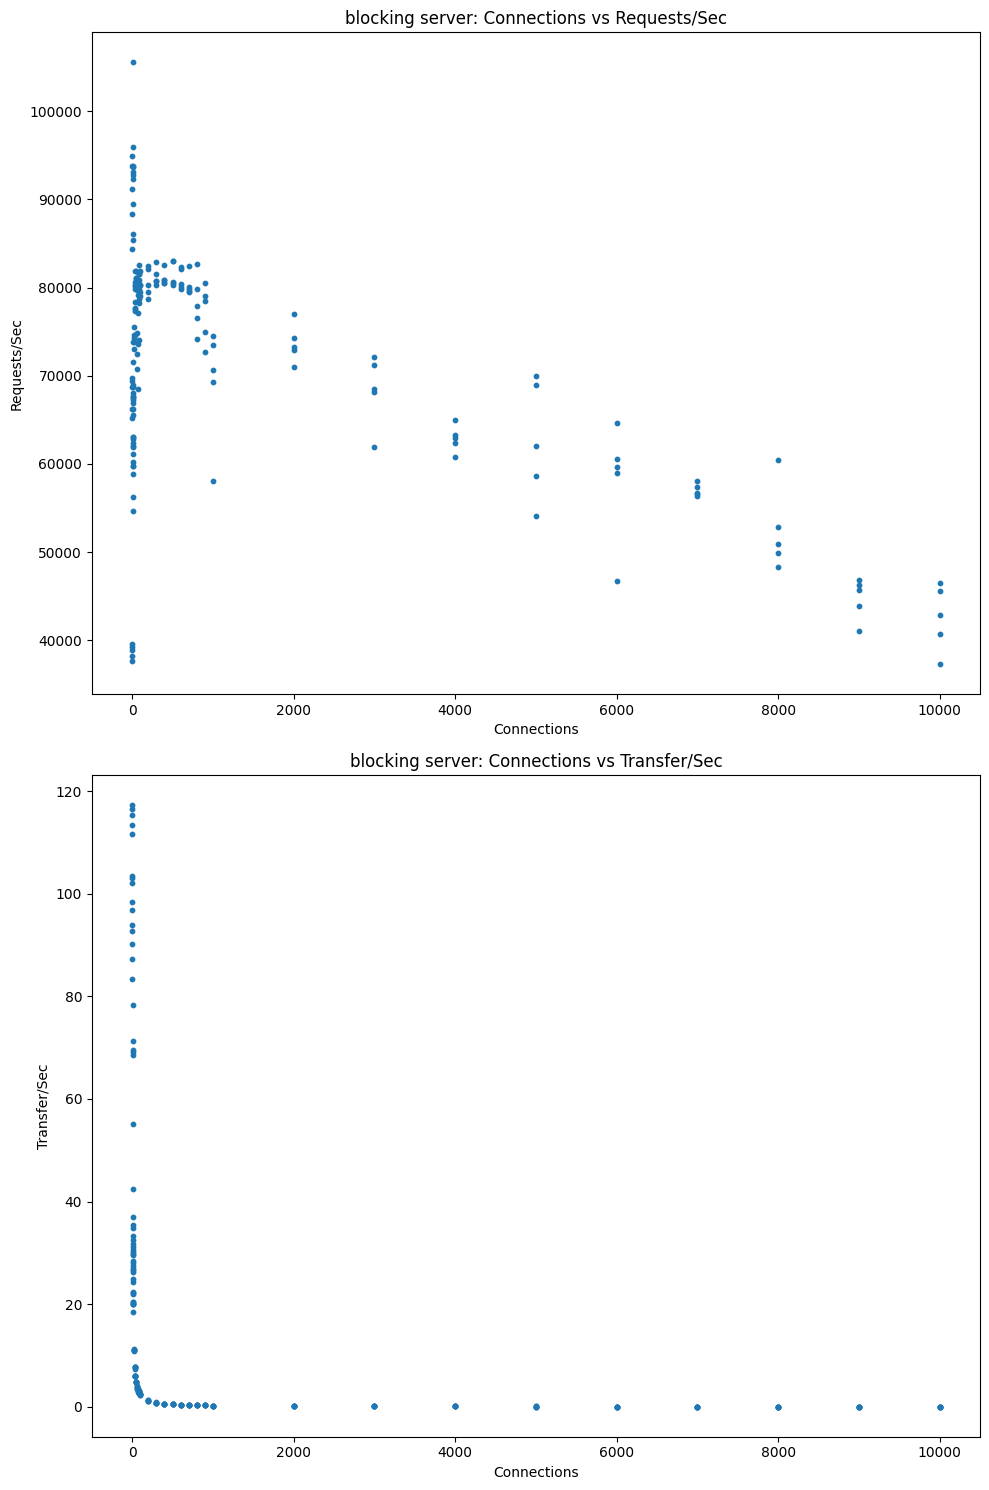

In [134]:
plot_graph(df_blocking)

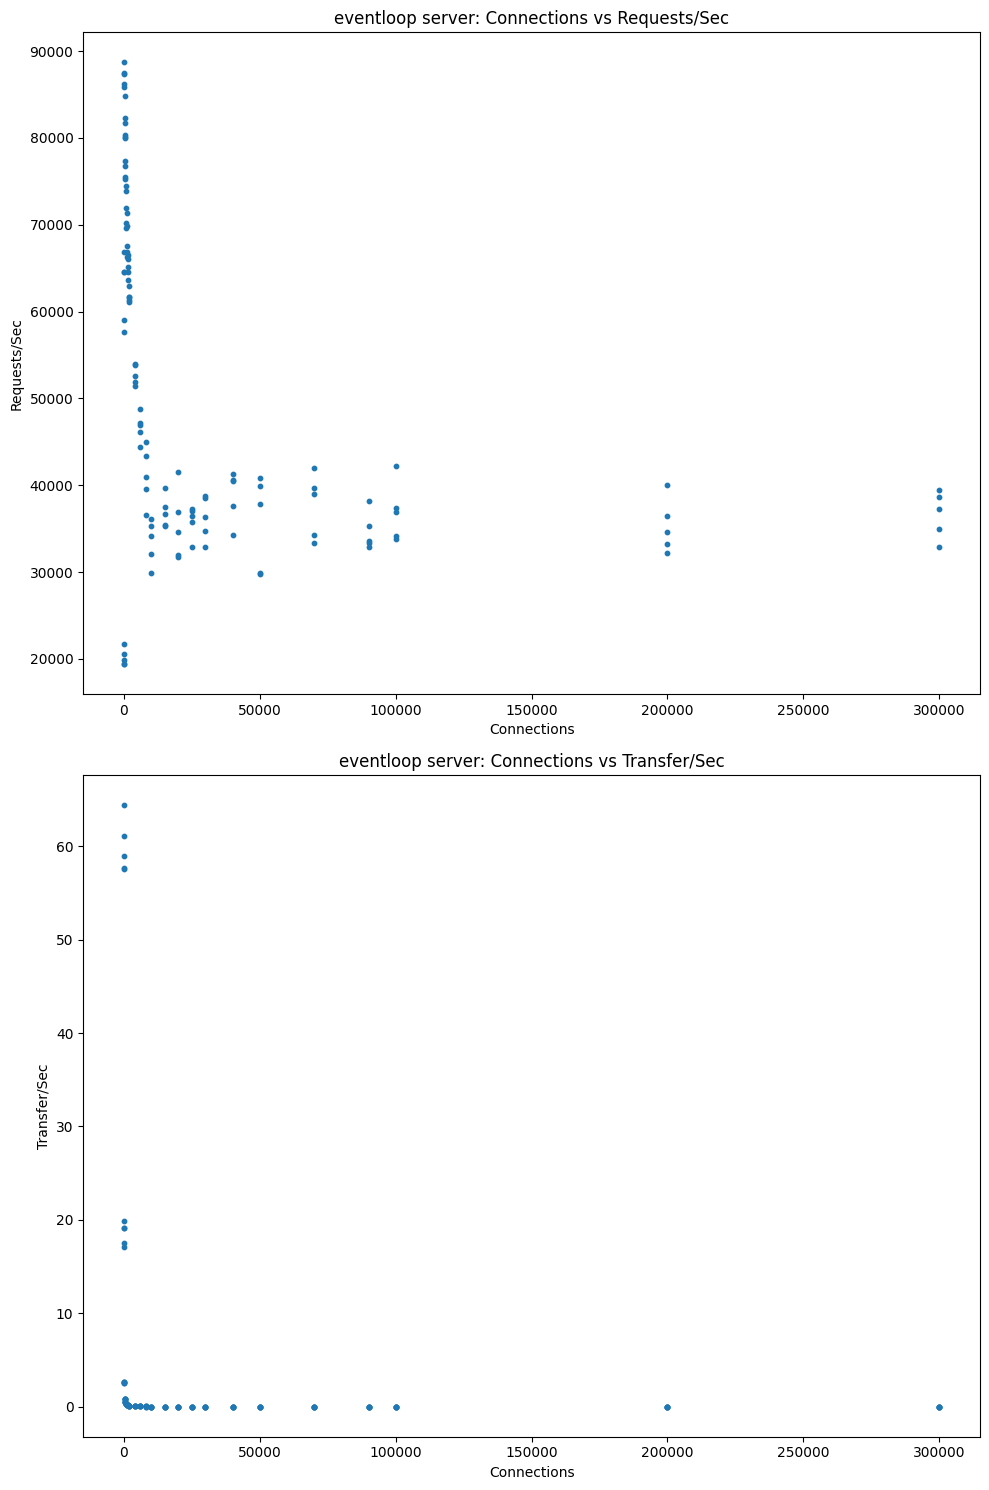

In [135]:
plot_graph(df_eventloop)

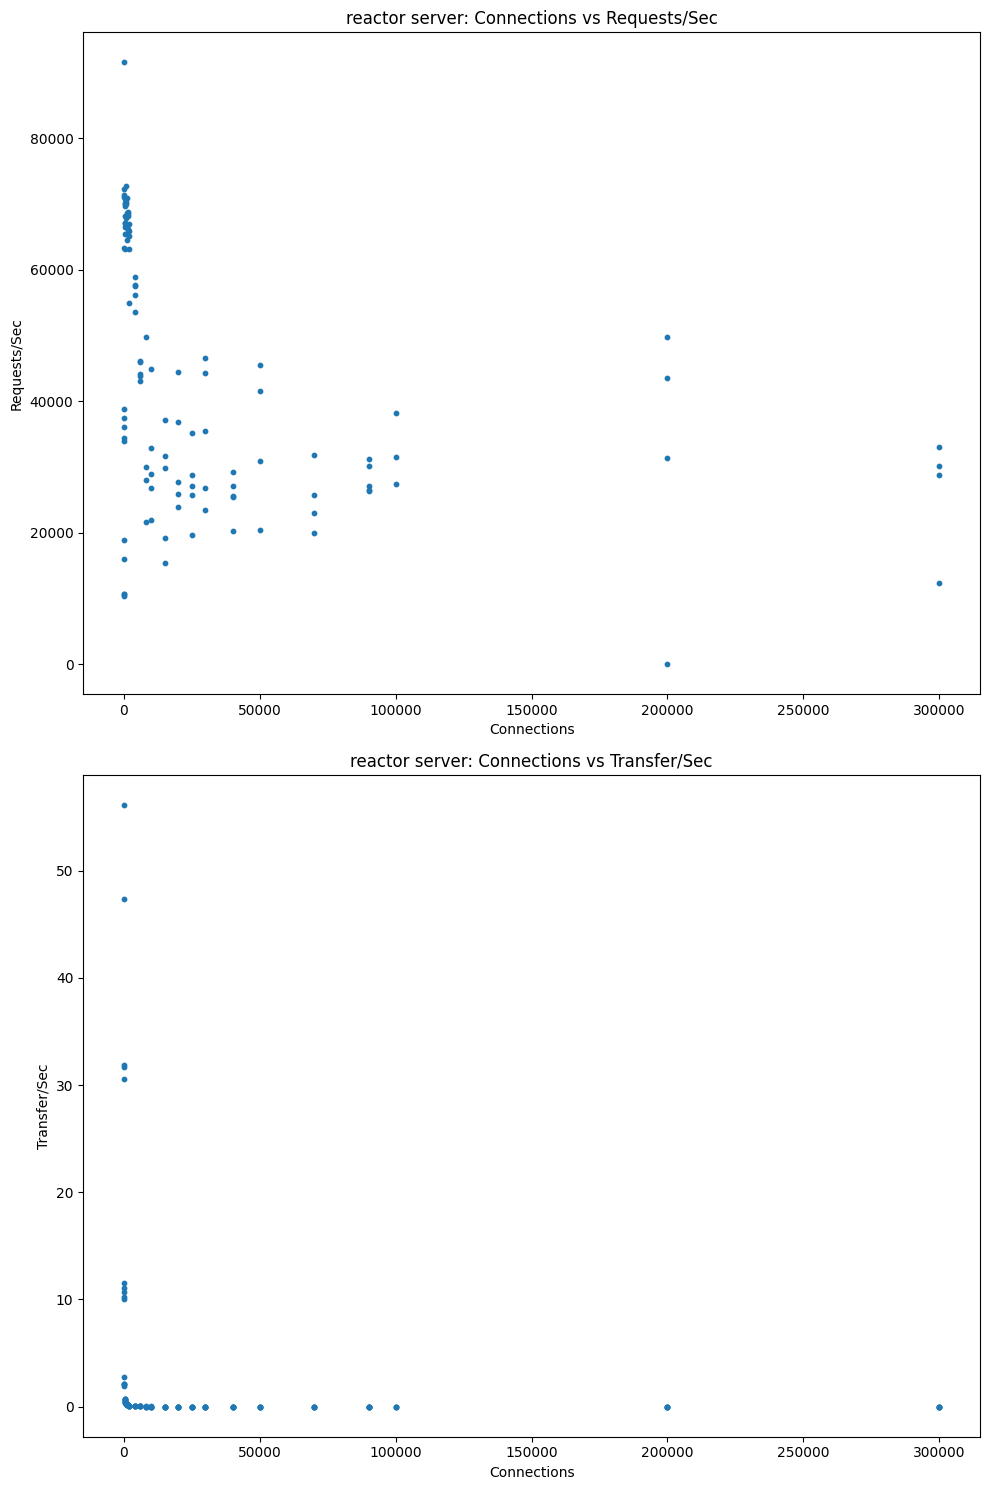

In [136]:
plot_graph(df_reactor)

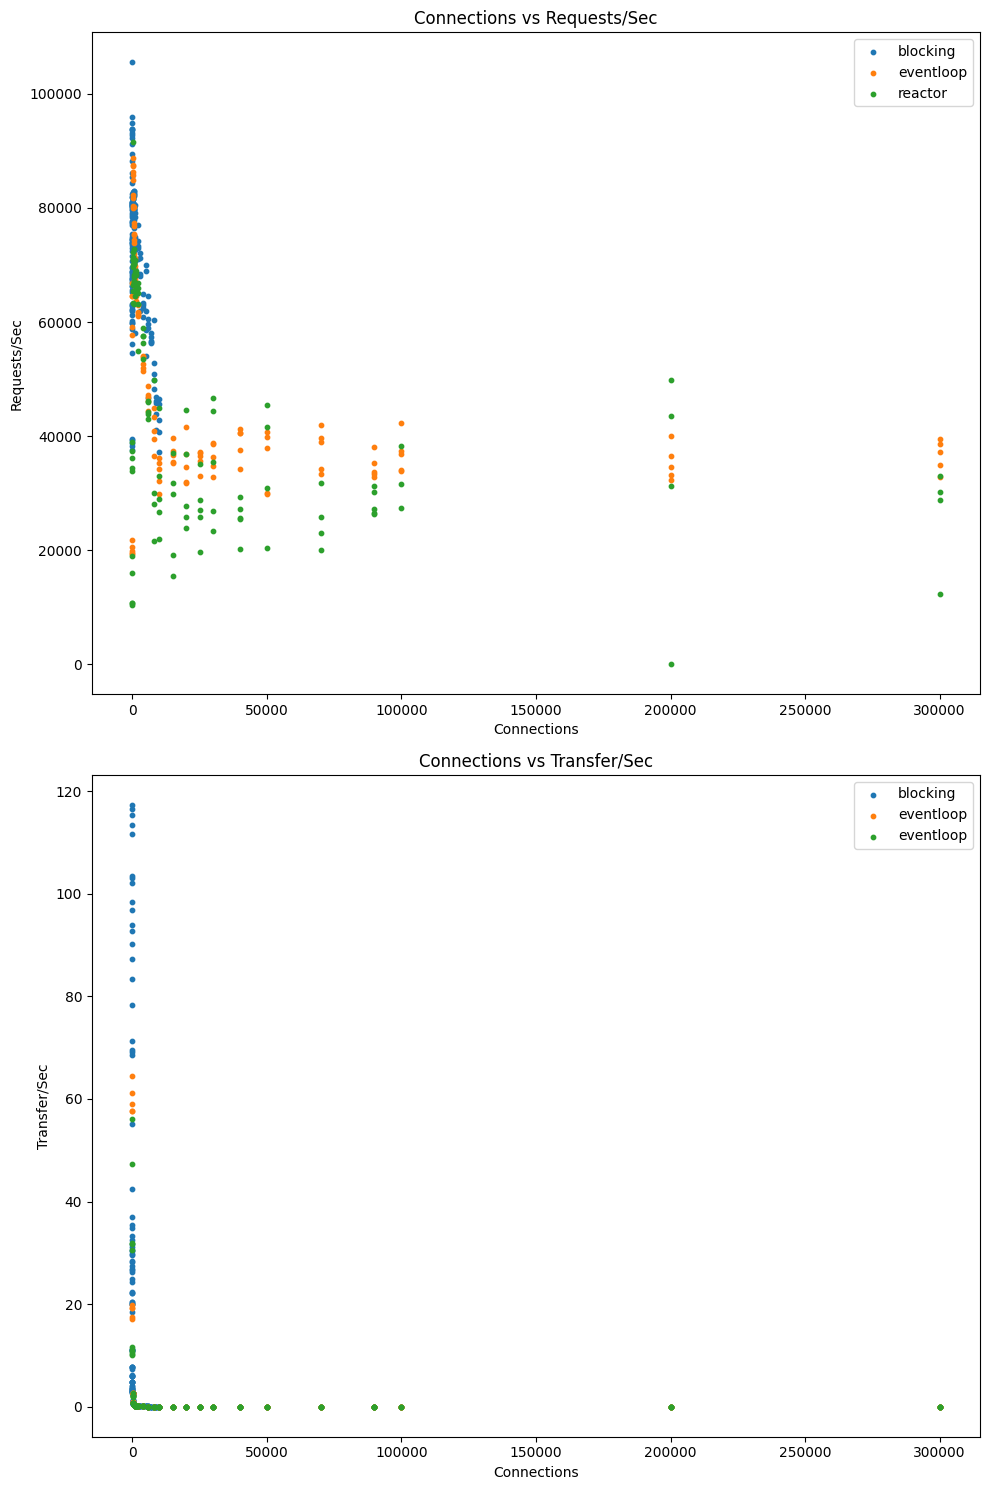

In [137]:
plot_graphs(df_blocking, df_eventloop, df_reactor)

In [138]:
df_blocking_before_1000 = df_blocking[df_blocking["Connections"] <= 1000]
df_blocking_after_1000 = df_blocking[df_blocking["Connections"] > 1000]

df_eventloop_before_1000 = df_eventloop[df_eventloop["Connections"] <= 1000]
df_eventloop_after_1000 = df_eventloop[df_eventloop["Connections"] > 1000]

df_reactor_before_1000 = df_reactor[df_reactor["Connections"] <= 1000]
df_reactor_after_1000 = df_reactor[df_reactor["Connections"] > 1000]

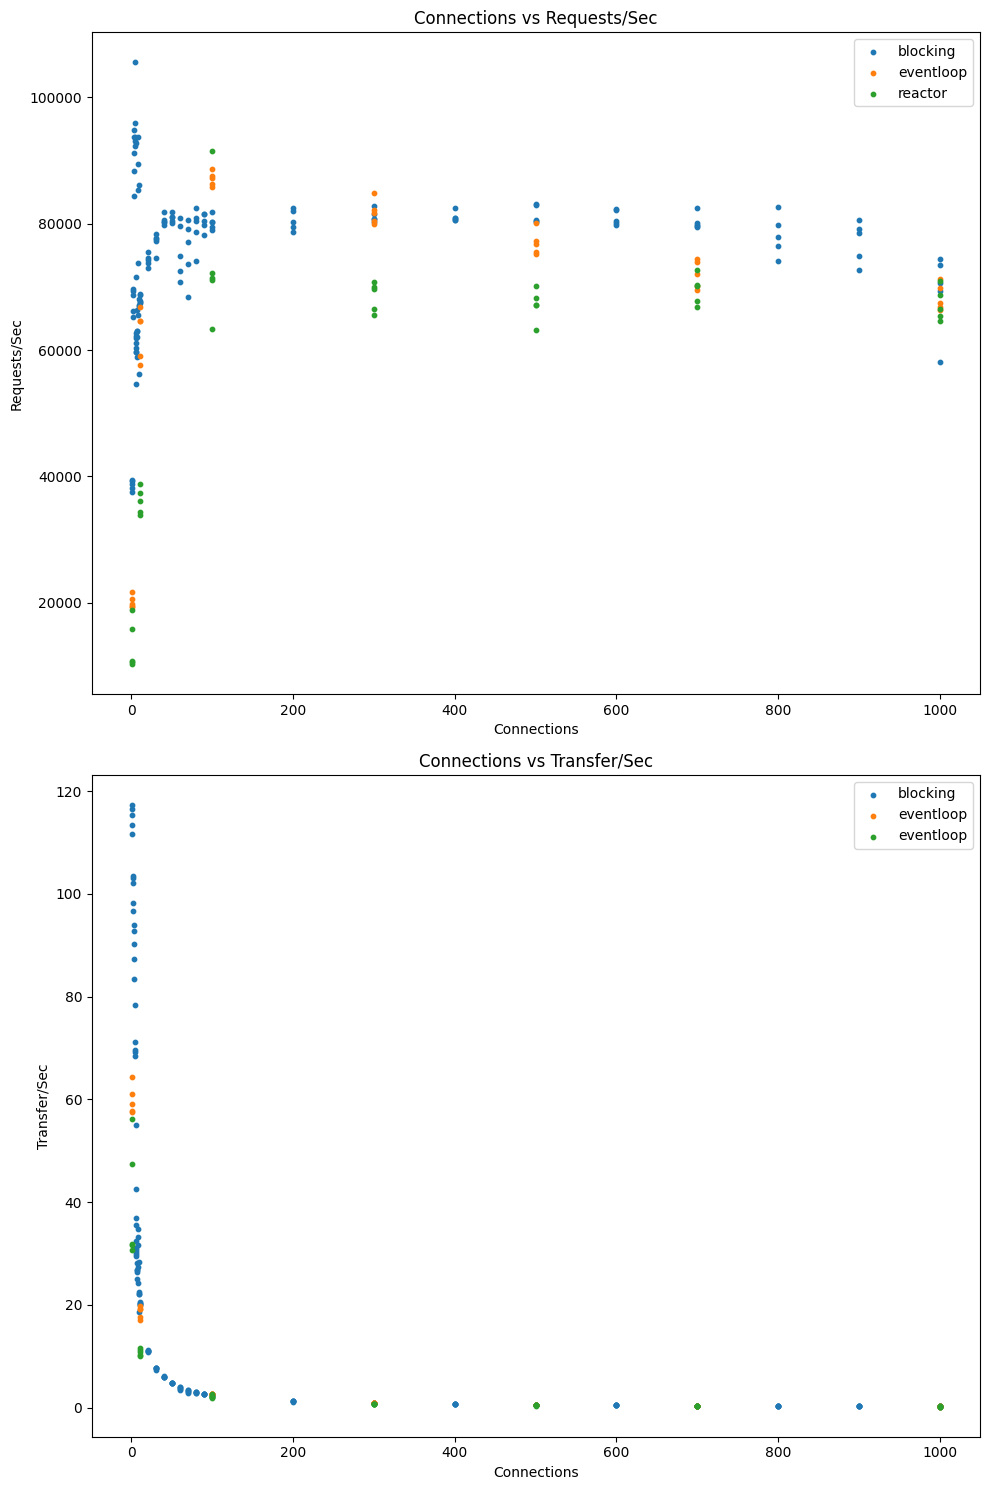

In [139]:
plot_graphs(df_blocking_before_1000, df_eventloop_before_1000, df_reactor_before_1000)

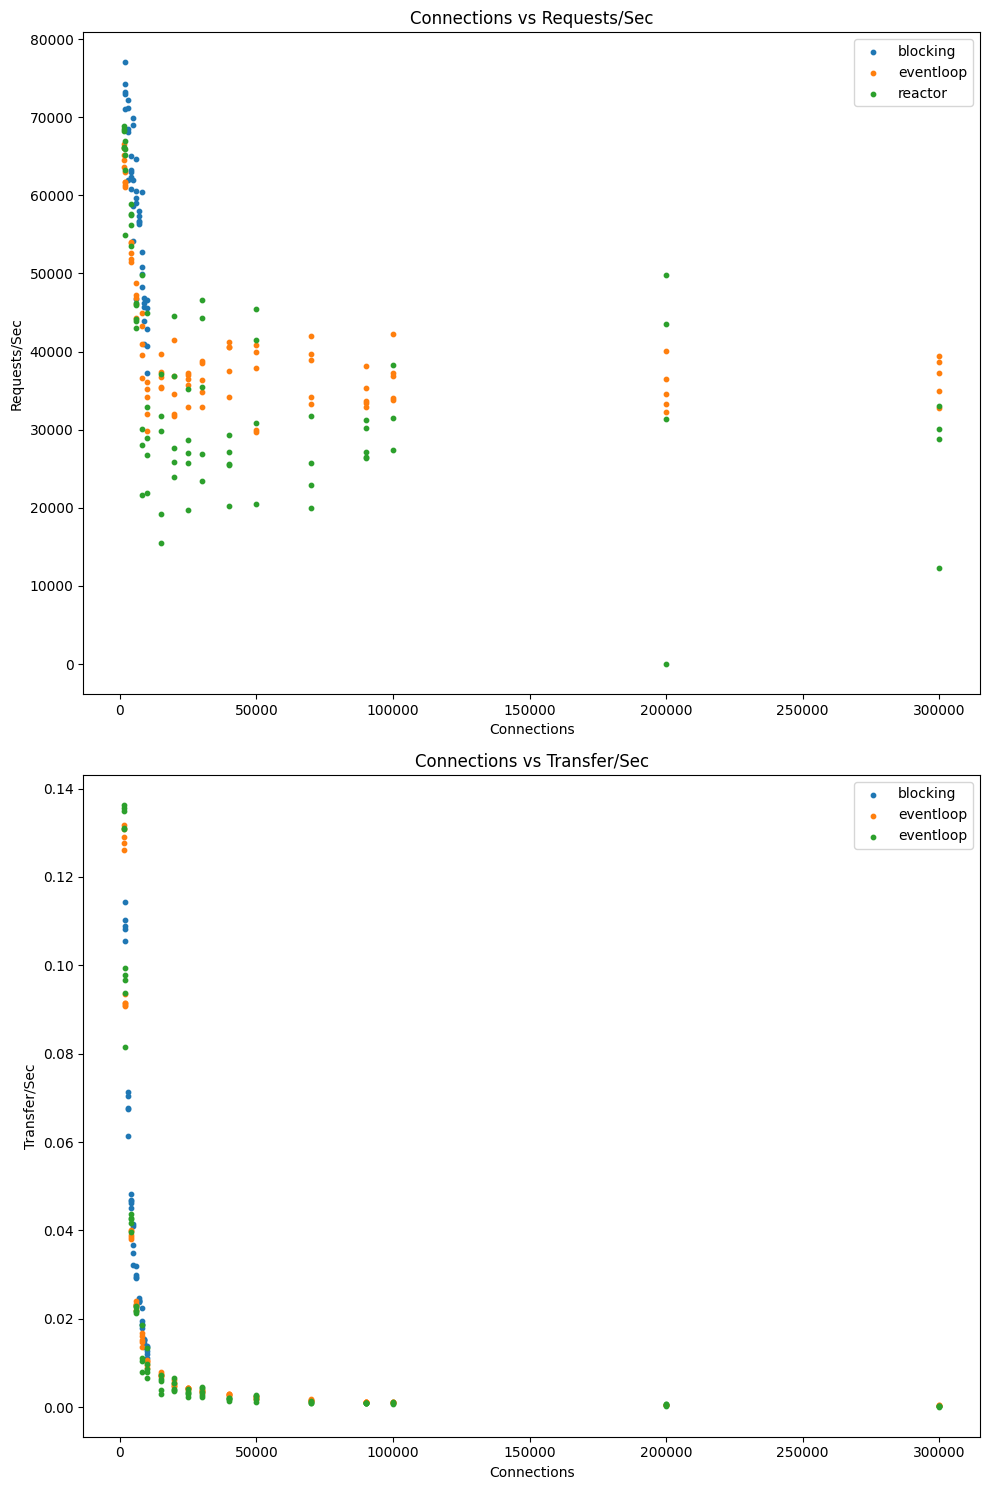

In [140]:
plot_graphs(df_blocking_after_1000, df_eventloop_after_1000, df_reactor_after_1000)